In [5]:
import pandas as pd

df = pd.read_csv("times.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   @@@                   1553 non-null   object 
 1   filename              1553 non-null   object 
 2   nblocks               1550 non-null   float64
 3   ninst                 1550 non-null   float64
 4   time_tr_subset        1553 non-null   int64  
 5   time_comp_subset      1553 non-null   int64  
 6   time_checker_subset   1553 non-null   int64  
 7   msg_subset            1553 non-null   object 
 8   time_tr_optimal       1553 non-null   int64  
 9   time_comp_optimal     1553 non-null   int64  
 10  time_checker_optimal  1553 non-null   int64  
 11  msg_optimal           1553 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 145.7+ KB


,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal
count,1550.000000,1550.000000,1553.000000,1.553000e+03,1553.000000,1553.000000,1.553000e+03,1553.000000
mean,44.059355,141.682581,39.783645,1.470037e+04,2.303928,39.607212,1.467534e+04,2.309079
std,51.912342,194.252386,6.959257,7.842875e+04,0.807721,7.477819,8.145454e+04,0.779754
min,2.000000,7.000000,34.000000,4.670000e+02,2.000000,35.000000,4.720000e+02,2.000000
25%,16.000000,42.000000,37.000000,5.206000e+03,2.000000,37.000000,5.045000e+03,2.000000
50%,28.000000,80.000000,38.000000,6.460000e+03,2.000000,38.000000,6.325000e+03,2.000000
75%,52.000000,165.000000,40.000000,9.714000e+03,2.000000,39.000000,9.622000e+03,2.000000
max,562.000000,2799.000000,114.000000,2.182111e+06,14.000000,150.000000,2.328861e+06,11.000000


In [8]:
df_tr_error = df[(df["msg_subset"] == "TRANSLATION_RUNTIME_ERROR") | (df["msg_optimal"] == "TRANSLATION_RUNTIME_ERROR")]
df_tr_error

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
785,@@@,python/semanticTests_cfg/experimental_stub__st...,NaN,NaN,83,467,2,TRANSLATION_RUNTIME_ERROR,83,473,2,TRANSLATION_RUNTIME_ERROR
855,@@@,python/semanticTests_cfg/experimental_type_cla...,NaN,NaN,84,469,2,TRANSLATION_RUNTIME_ERROR,82,472,2,TRANSLATION_RUNTIME_ERROR
894,@@@,python/semanticTests_cfg/reverts_eof_revert_re...,NaN,NaN,84,504,5,TRANSLATION_RUNTIME_ERROR,99,535,6,TRANSLATION_RUNTIME_ERROR


In [9]:
df = df[(df["msg_subset"] != "TRANSLATION_RUNTIME_ERROR") & (df["msg_optimal"] != "TRANSLATION_RUNTIME_ERROR")]
df

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
0,@@@,python/semanticTests_cfg/strings_empty_string_...,60.0,196.0,39,10525,2,LIVENESS_VALID,39,9817,2,LIVENESS_VALID
1,@@@,python/semanticTests_cfg/viaYul_dirty_memory_s...,18.0,62.0,39,6717,2,LIVENESS_VALID,37,5993,2,LIVENESS_VALID
2,@@@,python/semanticTests_cfg/libraries_internal_li...,16.0,38.0,36,6697,2,LIVENESS_VALID,37,5797,2,LIVENESS_VALID
3,@@@,python/semanticTests_cfg/operators_shifts_shif...,21.0,53.0,38,6227,9,LIVENESS_VALID,83,6553,2,LIVENESS_VALID
4,@@@,python/semanticTests_cfg/types_convert_fixed_b...,12.0,27.0,40,5556,2,LIVENESS_VALID,39,5814,2,LIVENESS_VALID
...,...,...,...,...,...,...,...,...,...,...,...,...
1548,@@@,python/semanticTests_cfg/functionCall_value_te...,10.0,25.0,37,4637,2,LIVENESS_VALID,37,4189,2,LIVENESS_VALID
1549,@@@,python/semanticTests_cfg/array_copying_array_c...,84.0,379.0,41,20214,2,LIVENESS_VALID,42,20525,2,LIVENESS_VALID
1550,@@@,python/semanticTests_cfg/immutable_getter_call...,73.0,211.0,41,8720,3,LIVENESS_VALID,39,8967,2,LIVENESS_VALID
1551,@@@,python/semanticTests_cfg/structs_delete_struct...,36.0,115.0,37,5711,2,LIVENESS_VALID,38,5839,2,LIVENESS_VALID


In [10]:
df_diff = df[df["msg_subset"] != df["msg_optimal"]]
df_diff

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal


In [13]:
df_diff_times = df[df["time_checker_subset"] != df["time_checker_optimal"]]
df_diff_times

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
3,@@@,python/semanticTests_cfg/operators_shifts_shif...,21.0,53.0,38,6227,9,LIVENESS_VALID,83,6553,2,LIVENESS_VALID
6,@@@,python/semanticTests_cfg/array_indexAccess_mem...,52.0,183.0,38,16449,6,LIVENESS_VALID,87,18448,3,LIVENESS_VALID
7,@@@,python/semanticTests_cfg/arithmetics_checked_m...,21.0,52.0,39,6930,3,LIVENESS_VALID,39,7036,2,LIVENESS_VALID
8,@@@,python/semanticTests_cfg/functionCall_call_att...,42.0,124.0,49,9324,2,LIVENESS_VALID,41,9477,3,LIVENESS_VALID
9,@@@,python/semanticTests_cfg/functionCall_inherita...,115.0,240.0,39,13112,3,LIVENESS_VALID,44,12161,6,LIVENESS_VALID
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,@@@,python/semanticTests_cfg/inheritance_derived_o...,58.0,138.0,38,8588,4,LIVENESS_VALID,71,8728,2,LIVENESS_VALID
1524,@@@,python/semanticTests_cfg/functionTypes_store_f...,78.0,235.0,40,11447,3,LIVENESS_VALID,41,11468,5,LIVENESS_VALID
1528,@@@,python/semanticTests_cfg/abiEncoderV1_abi_deco...,24.0,74.0,38,5130,2,LIVENESS_VALID,38,5044,3,LIVENESS_VALID
1541,@@@,python/semanticTests_cfg/literals_hex_string_w...,14.0,53.0,36,4881,2,LIVENESS_VALID,41,4753,4,LIVENESS_VALID


In [39]:
df_fast = df[df["time_checker_subset"] == 14]
df_fast

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
1160,@@@,python/semanticTests_cfg/inlineAssembly_diffic...,12.0,27.0,37,4497,14,LIVENESS_VALID,65,4404,2,LIVENESS_VALID


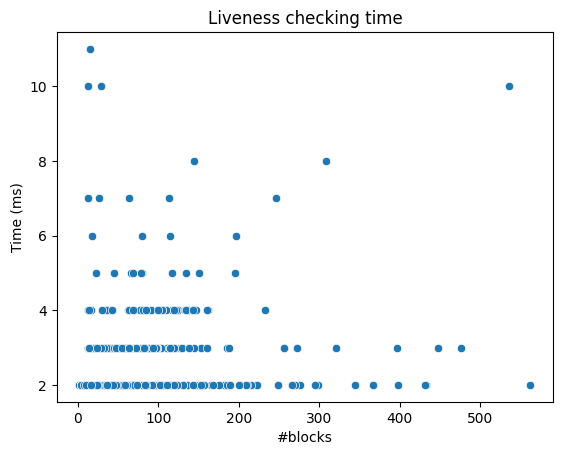

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="nblocks", y="time_checker_optimal")

plt.xlabel("#blocks")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time")
plt.savefig("times_blocks.png", dpi=500, bbox_inches='tight')
plt.show()


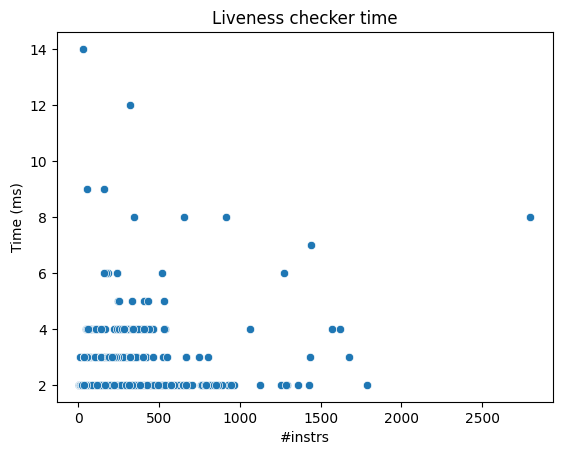

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="ninst", y="time_checker_subset")

plt.xlabel("#instrs")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time")
plt.savefig("times_instr.png", dpi=500, bbox_inches='tight')
plt.show()

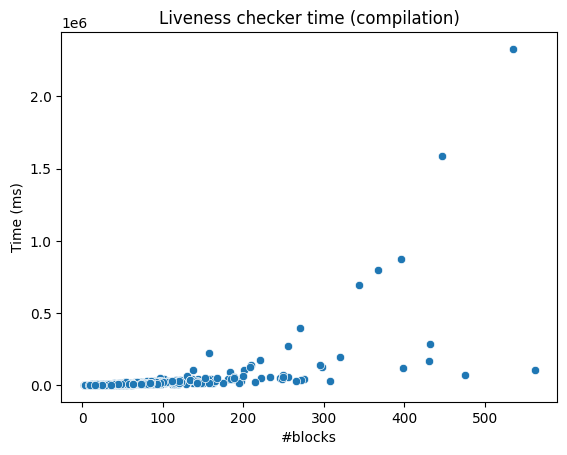

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="nblocks", y="time_comp_optimal")

plt.xlabel("#blocks")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time (compilation)")
plt.savefig("comp_blocks.png", dpi=500, bbox_inches='tight')
plt.show()


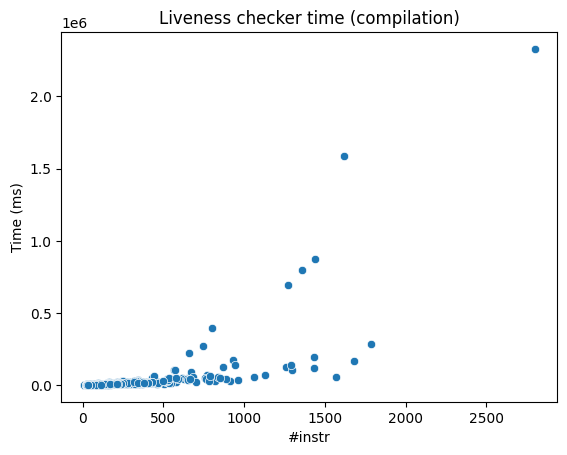

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="ninst", y="time_comp_optimal")

plt.xlabel("#instr")
plt.ylabel("Time (ms)")
plt.title("Liveness checker time (compilation)")
plt.savefig("comp_instr.png", dpi=500, bbox_inches='tight')
plt.show()

In [65]:
t = df[["time_tr_subset", "time_comp_subset", "time_checker_subset", "time_tr_optimal", "time_comp_optimal", "time_checker_optimal"]].sum()
t
# print(f"Total time: {t/(1000*60*60)} h")

time_tr_subset             61533
time_comp_subset        22828239
time_checker_subset         3569
time_tr_optimal            61246
time_comp_optimal       22789329
time_checker_optimal        3576
dtype: int64

In [71]:
df[df['nblocks'] == 2]

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
198,@@@,python/semanticTests_cfg/constructor_payable_c...,2.0,7.0,38,4362,2,LIVENESS_VALID,36,4648,2,LIVENESS_VALID
325,@@@,python/semanticTests_cfg/isoltestTesting_balan...,2.0,7.0,36,5985,2,LIVENESS_VALID,35,5406,2,LIVENESS_VALID
663,@@@,python/semanticTests_cfg/isoltestTesting_balan...,2.0,7.0,35,5476,2,LIVENESS_VALID,36,5345,2,LIVENESS_VALID


In [73]:
df[df['nblocks'] == 562]

,@@@,filename,nblocks,ninst,time_tr_subset,time_comp_subset,time_checker_subset,msg_subset,time_tr_optimal,time_comp_optimal,time_checker_optimal,msg_optimal
1217,@@@,python/semanticTests_cfg/externalContracts_prb...,562.0,1295.0,59,104837,2,LIVENESS_VALID,63,104084,2,LIVENESS_VALID
